In [ ]:
"""
This file will be used to run analysis on estimated density values.
There are both conditional and unconditional densities.
currently, there are 2 versions train_conditional and train_unconditional vs train_conditional_corrected and train_unconditional_corrected.
The "corrected" versions have the bug fix for the also taking the source log prob into account. in the non-corrected versions, only
the divergence is taken into account.
"""

In [1]:
import os
import json
import re
import numpy as np
import matplotlib.pyplot as plt


In [7]:
# list all the files in /BS/data_mani_compress/work/thesis/thesis/data/datasets/densities_new_imagenet/train_conditional_corrected/token_count_1
# and create an empty list and keep extending it per file
density_files_dir = '/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/train_conditional_corrected_hutchinson_8/token_count_4'

files = os.listdir(density_files_dir)

# Sort by the first integer in the filename
files.sort(key=lambda f: int(re.findall(r'\d+', f)[0]))

all_density_values = []
for i, filename in enumerate(files):
    if filename.endswith('.json'):
        file_path = os.path.join(density_files_dir, filename)
        with open(file_path, 'r') as f:
            density_data = json.load(f)
            if i == 23:
                all_density_values.extend(density_data)
                #print(len(all_density_values))
            else:
                all_density_values.extend(density_data)
                #print(len(all_density_values))
print(f'Total density values collected: {len(all_density_values)}')

# save the densitsies in json   
output_path = '/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/train_conditional_corrected_hutchinson_8/token_count_4/token_count_4_all.json'
with open(output_path, 'w') as f:
    json.dump(all_density_values, f)


Total density values collected: 543348


In [2]:
# read the conditional densities
folder_path = "/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/val/"

# with open(os.path.join(folder_path, "token_count_0/token_count_0_all.json"), 'r') as f:
#     conditional_densities_0 = json.load(f)

with open(os.path.join(folder_path, "token_count_1/_0000_0200.json"), 'r') as f:
    conditional_densities_1 = json.load(f)

with open(os.path.join(folder_path, "token_count_2/_0000_0200.json"), 'r') as f:
    conditional_densities_2 = json.load(f)

with open(os.path.join(folder_path, "token_count_4/_0000_0200.json"), 'r') as f:
    conditional_densities_4 = json.load(f)

with open(os.path.join(folder_path, "token_count_8/_0000_0200.json"), 'r') as f:
    conditional_densities_8 = json.load(f)

with open(os.path.join(folder_path, "token_count_16/_0000_0200.json"), 'r') as f:
    conditional_densities_16 = json.load(f)

with open(os.path.join(folder_path, "token_count_32/_0000_0200.json"), 'r') as f:
    conditional_densities_32 = json.load(f)

with open(os.path.join(folder_path, "token_count_64/_0000_0200.json"), 'r') as f:
    conditional_densities_64 = json.load(f)

with open(os.path.join(folder_path, "token_count_128/_0000_0200.json"), 'r') as f:
    conditional_densities_128 = json.load(f)

with open(os.path.join(folder_path, "token_count_256/_0000_0200.json"), 'r') as f:
    conditional_densities_256 = json.load(f)

# also get the unconditional densities
with open('/BS/data_mani_compress/work/thesis/thesis/data/datasets/density_imagenet/val/token_count_0/_0000_0200.json', 'r') as f:
    unconditional_densities = json.load(f)

print(len(unconditional_densities), len(conditional_densities_1), len(conditional_densities_2), len(conditional_densities_4))

2400 2400 2400 2400


In [3]:
# find the mean and std dev of each conditional density list
def compute_stats(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return mean, std_dev

conditional_stats = {}
for k, data in zip(
    [0, 1, 2, 4, 8, 16, 32, 64, 128, 256],
    [unconditional_densities, conditional_densities_1, conditional_densities_2, conditional_densities_4, conditional_densities_8, conditional_densities_16, conditional_densities_32, conditional_densities_64, conditional_densities_128, conditional_densities_256]
):
    mean, std_dev = compute_stats(data)
    conditional_stats[k] = {'mean': mean, 'std_dev': std_dev}

In [4]:
print("Conditional Density Stats:")
for k in sorted(conditional_stats.keys()):
    stats = conditional_stats[k]
    print(f"Token Count {k}: Mean = {stats['mean']}, Std Dev = {stats['std_dev']}")

Conditional Density Stats:
Token Count 0: Mean = 34144.00530598958, Std Dev = 5798.515653813549
Token Count 1: Mean = 34321.39980794271, Std Dev = 5774.854964607213
Token Count 2: Mean = 34140.123202311195, Std Dev = 5719.28595453622
Token Count 4: Mean = 34148.10297119141, Std Dev = 5715.005065536915
Token Count 8: Mean = 34213.14402750651, Std Dev = 5623.71648634413
Token Count 16: Mean = 34446.43834879557, Std Dev = 5672.176335576535
Token Count 32: Mean = 34402.06032552083, Std Dev = 5688.460485960051
Token Count 64: Mean = 34297.46907145182, Std Dev = 5604.410147492562
Token Count 128: Mean = 34465.15888102214, Std Dev = 5566.571730050578
Token Count 256: Mean = 34778.635473632814, Std Dev = 5442.272532835139


dict_keys([0, 1, 2, 4, 8, 16, 32, 64, 128, 256])


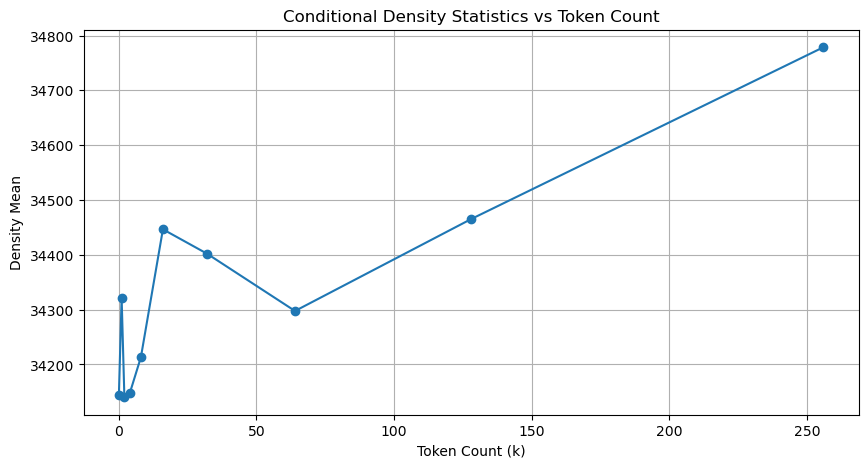

In [6]:
# plot mean for each conditional density
print(conditional_stats.keys())
k_values = sorted(conditional_stats.keys())
means = [conditional_stats[k]['mean'] for k in k_values]
plt.figure(figsize=(10, 5))
plt.plot(k_values, means, marker='o')
#plt.xscale('log', base=2)
plt.xlabel('Token Count (k)')
plt.ylabel('Density Mean')
plt.title('Conditional Density Statistics vs Token Count')
plt.grid(True)
plt.show()